In [2]:
import numpy as np
import jPCA
import matplotlib.pyplot as plt
from jPCA.util import load_churchland_data, plot_projections

In [56]:
class JPCA_calc:
    def __init__(self, B, tstart=0, tend=0.3, circle_size=0.01, arrow_size=0.01) -> None:
        datasB, timesB = load_churchland_data(B)

        # Create a jPCA object
        jpca = jPCA.JPCA(num_jpcs=6)  # Extract up to 6 PCs

        self.jpca = jpca
        self.circle_size = circle_size
        self.arrow_size = arrow_size

        # Fit the jPCA object to data
        (projected, 
         full_data_var,
         pca_var_capt,
         jpca_var_capt) = jpca.fit(datasB, times=timesB, tstart=tstart, tend=tend)

        self.full_data_var = full_data_var
        self.pca_var_capt = pca_var_capt
        self.jpca_var_capt = jpca_var_capt

        freq = self.get_eigen()
        var = self.get_variance()

        # Plot all three planes
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        for i, ax in enumerate(axes):
            plot_projections(
                projected,
                circles=1,
                circle_size=self.circle_size,
                arrow_size=self.arrow_size,
                axis=ax,
                x_idx=2 * i,   # PC1, PC3, PC5
                y_idx=2 * i + 1  # PC2, PC4, PC6
            )
            ax.set_title(f"jPCA Plane {i+1}")
            ax.annotate(
                f"Var: {var[i]:.2f}, Freq: {freq[i + i+1]:.2f}", 
                xy=(0.5, 1.1), 
                xycoords="axes fraction", 
                ha="center", 
                fontsize=10,
            )

        # Add overall title from file name
        fig.suptitle(f"jPCA Results for {str(B).split('.')[0]}", fontsize=14, y=1.05)

        plt.tight_layout()
        plt.savefig(f"{str(B).split('.')[0]}_all_PC.jpg")
        plt.show()
        
    def get_variance(self):
        variance_ratios = self.jpca_var_capt / self.full_data_var
        print(variance_ratios)
        paired_sums = [variance_ratios[i] + variance_ratios[i + 1] for i in range(0, len(variance_ratios) - 1, 2)]
        return paired_sums

    def get_eigen(self):
        # Compute eigenvalues and angular frequencies
        angular_speeds = np.abs(np.round(np.linalg.eigvals(self.jpca.M_skew), 3))
        frequencies = angular_speeds / (2 * np.pi) 
        frequencies = frequencies * 100  # Convert to Hz
        return frequencies

# Neural Data

[0.06248822 0.06984364 0.10844257 0.23869958 0.31033473 0.09672297]


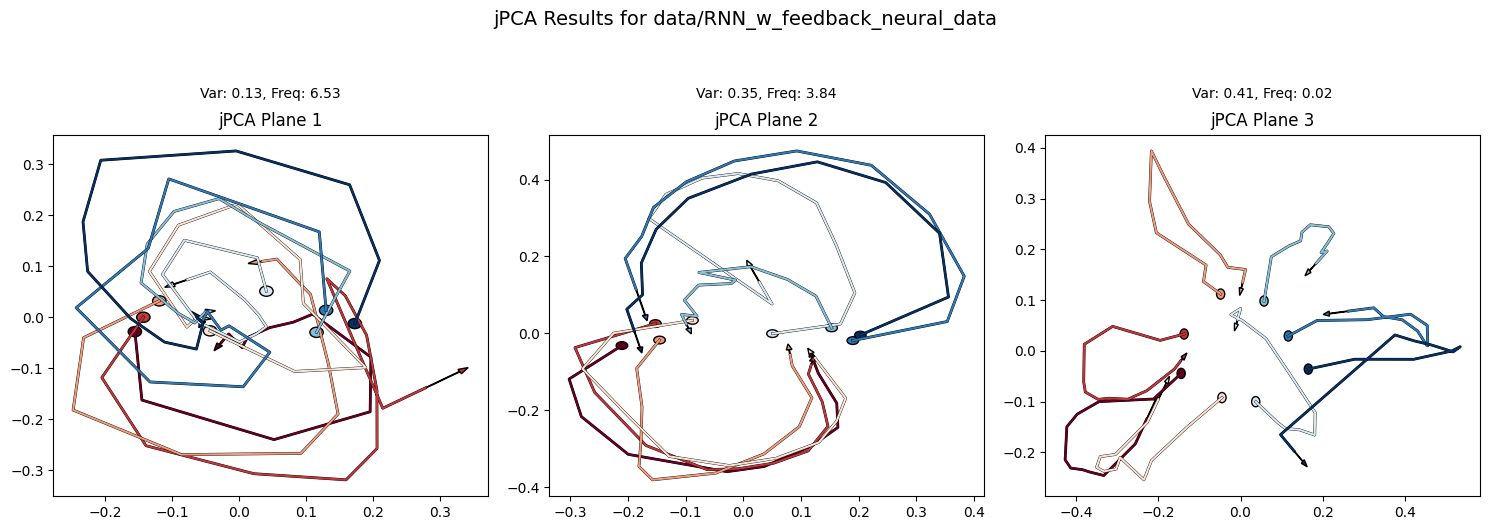

[0.06248822 0.06984364 0.10844257 0.23869958 0.31033473 0.09672297]
variance:  0.8865317112436474
frequency:  [6.52535267 6.52535267 3.83563413 3.83563413 0.01591549 0.01591549]


In [84]:
# A = "data/MLP_final_neural_data_main_joints_regularized.mat"
#B = "data/MLP_final_neural_data_w_sigmoid.mat"
C = "data/RNN_w_feedback_neural_data.mat"

mats = [ C]

for x in mats:
    neural = JPCA_calc(x, tstart=0.02, tend=0.24)
    print("variance: ", np.sum(neural.get_variance()))
    print("frequency: ", neural.get_eigen())

[0.09694447 0.12051584 0.1110248  0.08812735 0.2829332  0.09068662]


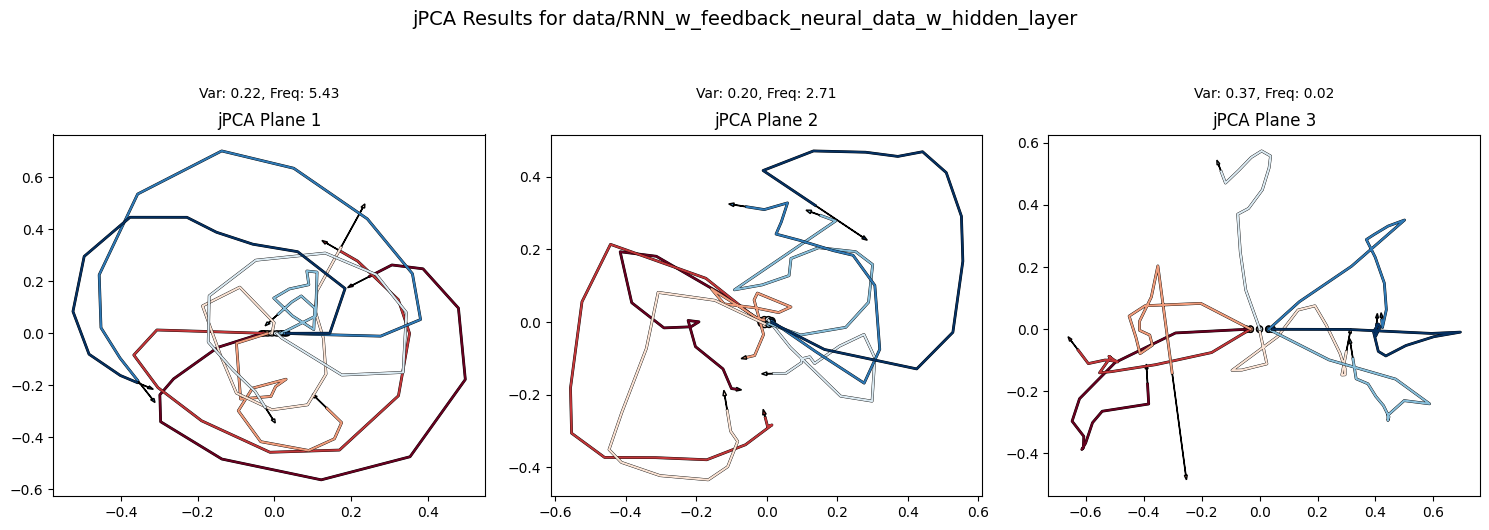

[0.09694447 0.12051584 0.1110248  0.08812735 0.2829332  0.09068662]
variance:  0.790232281577168
frequency:  [5.42718356 5.42718356 2.70563403 2.70563403 0.01591549 0.01591549]


In [65]:
# A = "data/MLP_final_neural_data_main_joints_regularized.mat"
#B = "data/MLP_final_neural_data_w_sigmoid.mat"
C = "data/RNN_w_feedback_neural_data_w_hidden_layer.mat"

mats = [ C]

for x in mats:
    neural = JPCA_calc(x, tstart=0, tend=0.24)
    print("variance: ", np.sum(neural.get_variance()))
    print("frequency: ", neural.get_eigen())

# Muscle Activity Data

data/RNN_w_feedback_muscle.mat
[0.06248441 0.10179621 0.06599761 0.05968126 0.43686108 0.14289326]


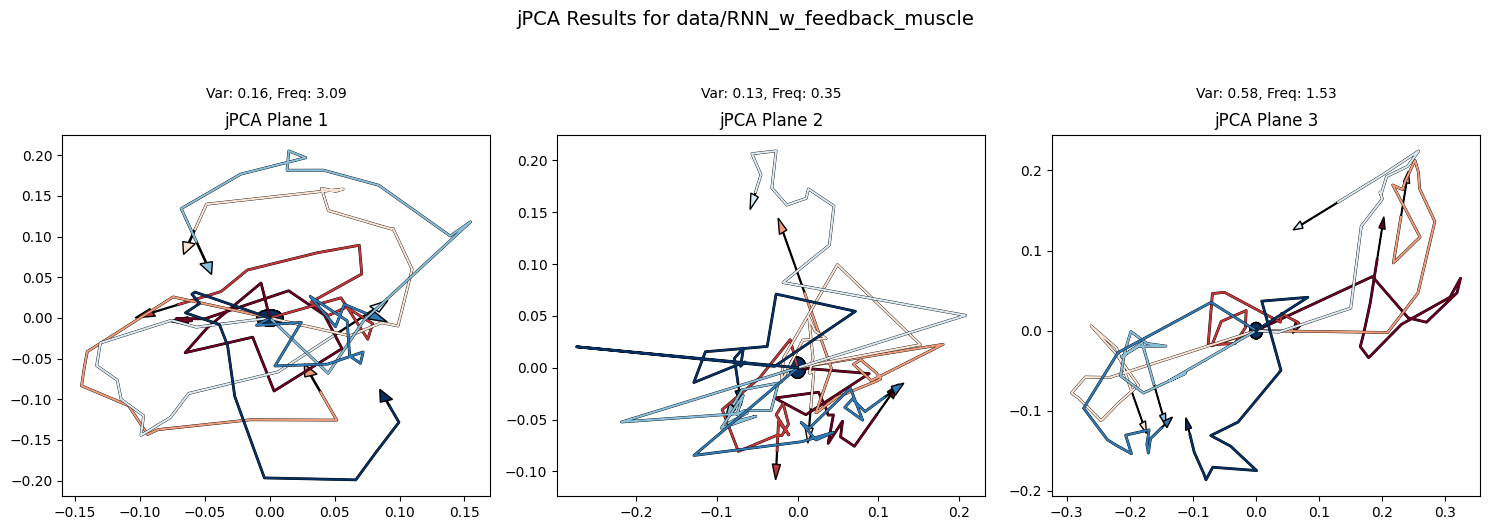

[0.06248441 0.10179621 0.06599761 0.05968126 0.43686108 0.14289326]
variance:  0.8697138276774017
frequency:  [3.0876059  3.0876059  0.35014087 0.35014087 1.52788745 1.52788745]
data/MLP_final_muscle_data_w_sigmoid.mat
[0.09643671 0.07992367 0.43946012 0.04171191 0.10753777 0.16596605]


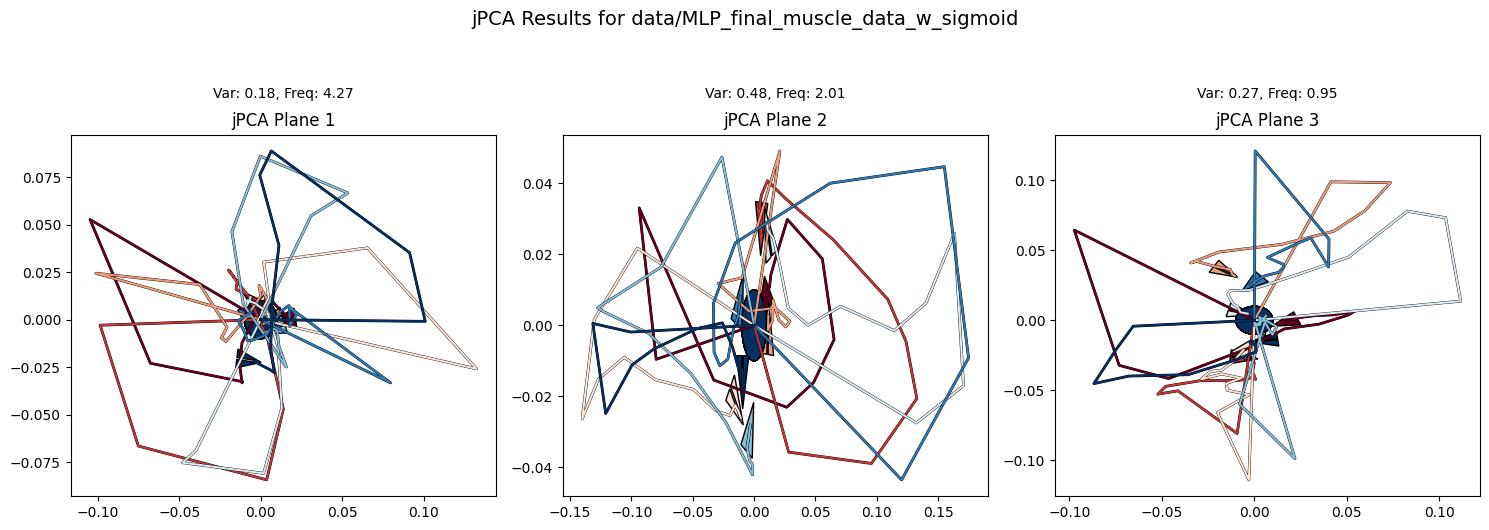

[0.09643671 0.07992367 0.43946012 0.04171191 0.10753777 0.16596605]
variance:  0.931036232808118
frequency:  [4.26535247 4.26535247 2.00535228 2.00535228 0.95492966 0.95492966]
data/RNN_final_muscle_data_main_joints_regularized.mat
[0.03554508 0.06390101 0.09508179 0.07084327 0.02582302 0.6555292 ]


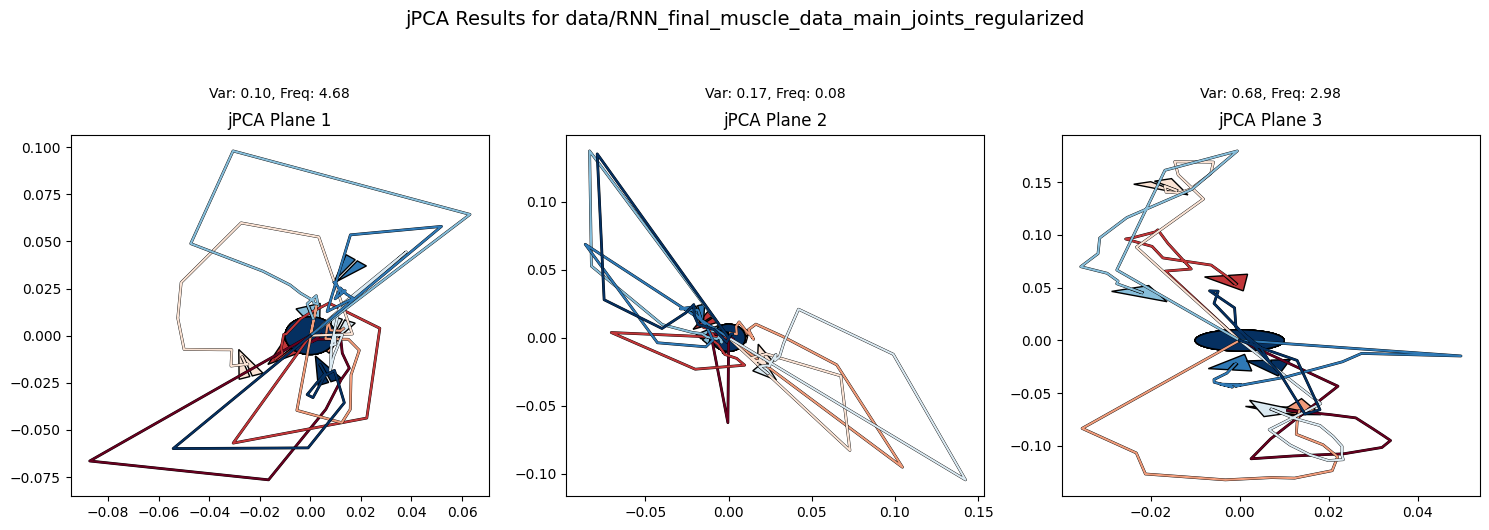

[0.03554508 0.06390101 0.09508179 0.07084327 0.02582302 0.6555292 ]
variance:  0.946723375719307
frequency:  [4.67915533 4.67915533 0.07957747 0.07957747 2.97619744 2.97619744]


In [66]:
A = "data/RNN_w_feedback_muscle.mat"
B = "data/MLP_final_muscle_data_w_sigmoid.mat"
C = "data/RNN_final_muscle_data_main_joints_regularized.mat"

mats = [A, B, C]

for x in mats:
    print(x)
    neural = JPCA_calc(x, tstart=0, tend=0.24)
    print("variance: ", np.sum(neural.get_variance()))
    print("frequency: ", neural.get_eigen())



# Joint/Fiber Data (Velocity and length)

data/RNN_w_feedback_fiberjoint.mat
[0.05647791 0.05158567 0.06891173 0.49842264 0.10078428 0.13738556]


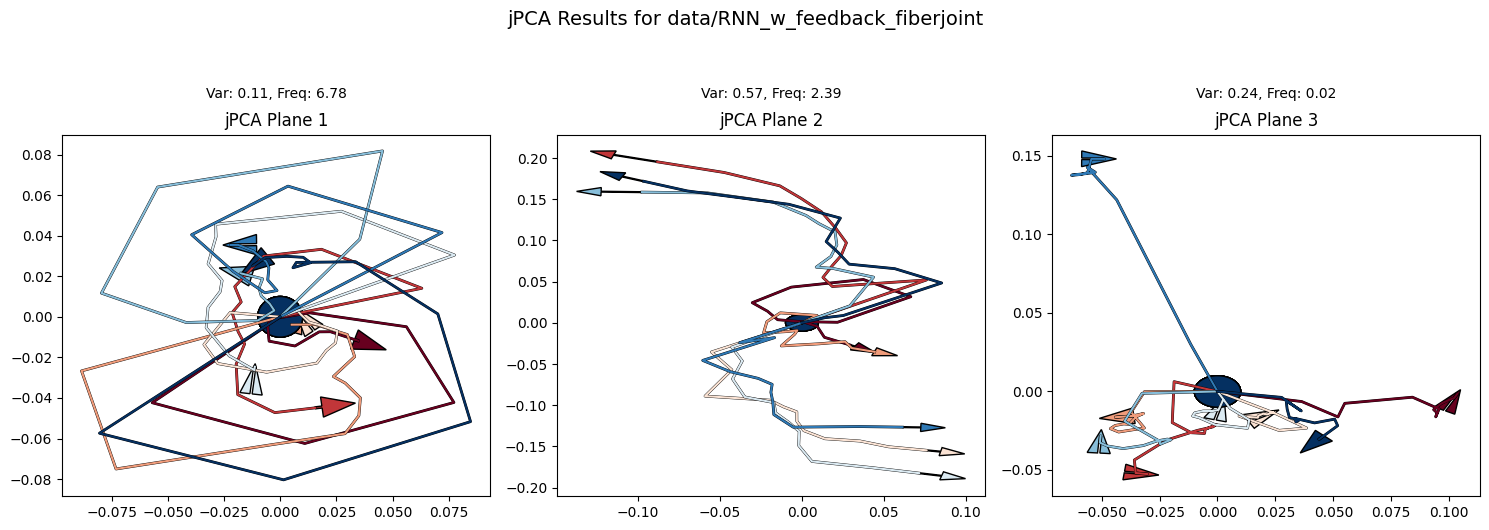

[0.05647791 0.05158567 0.06891173 0.49842264 0.10078428 0.13738556]
variance:  0.9135677856890154
frequency:  [6.78000058 6.78000058 2.38732415 2.38732415 0.01591549 0.01591549]
data/MLP_final_fiberjoint_data_w_sigmoid.mat
[0.03426329 0.0367994  0.50252429 0.08824367 0.03722074 0.22450735]


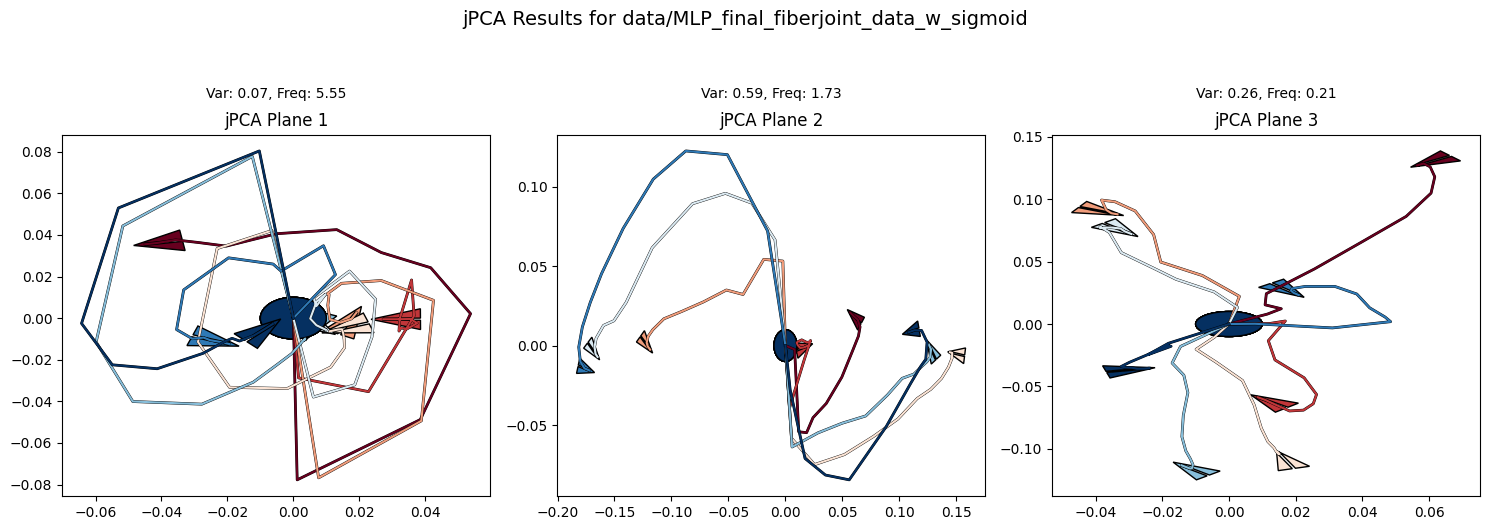

[0.03426329 0.0367994  0.50252429 0.08824367 0.03722074 0.22450735]
variance:  0.9235587422619833
frequency:  [5.55450751 5.55450751 1.73478888 1.73478888 0.20690143 0.20690143]
data/RNN_final_fiberjoint_data_main_joints_regularized
[0.08514415 0.03583319 0.46459281 0.08063016 0.19381312 0.07703725]


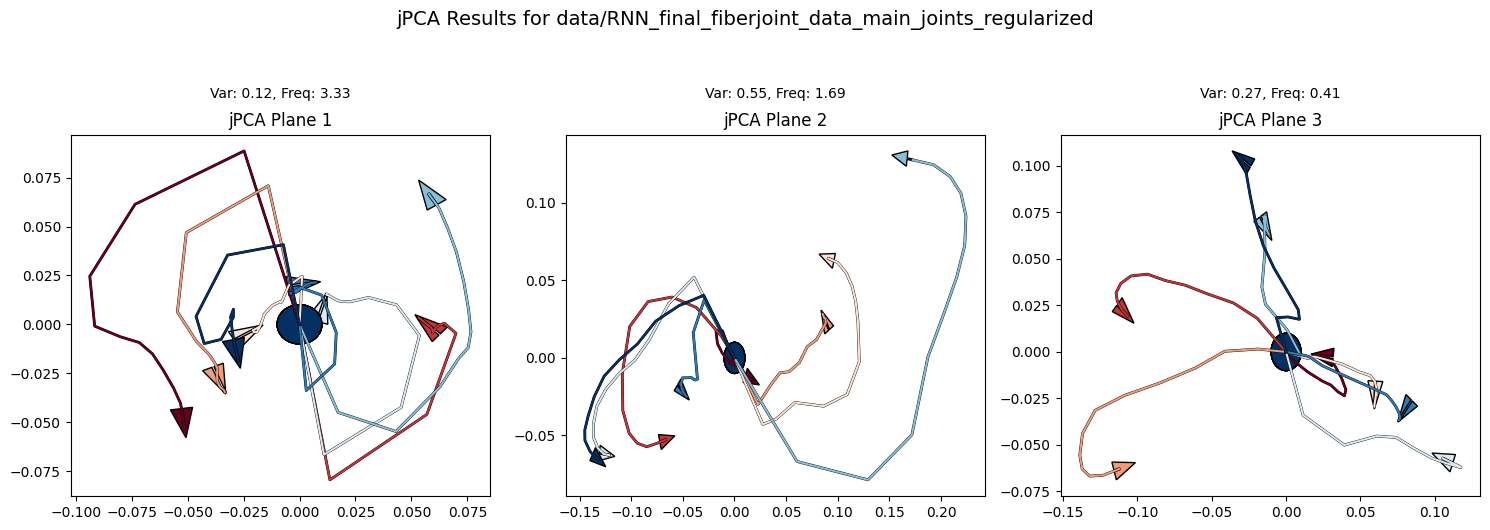

[0.08514415 0.03583319 0.46459281 0.08063016 0.19381312 0.07703725]
variance:  0.9370506828619998
frequency:  [3.32633831 3.32633831 1.6870424  1.6870424  0.41380285 0.41380285]


In [67]:
A = "data/RNN_w_feedback_fiberjoint.mat"
B = "data/MLP_final_fiberjoint_data_w_sigmoid.mat"
C = "data/RNN_final_fiberjoint_data_main_joints_regularized"

mats = [A, B, C]

for x in mats:
    print(x)
    neural = JPCA_calc(x, tstart=0, tend=0.24)
    print("variance: ", np.sum(neural.get_variance()))
    print("frequency: ", neural.get_eigen())



# Fiber Data

[0.26330739 0.16114484 0.0915414  0.03319143 0.36777306 0.06253706]


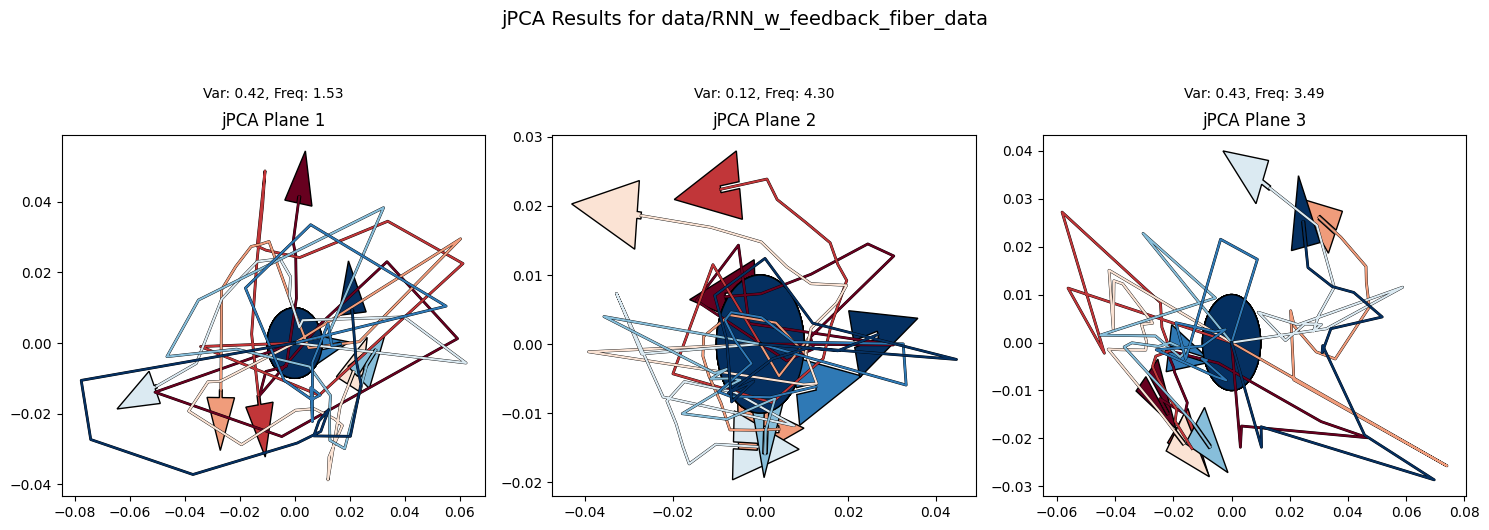

data/RNN_w_feedback_fiber_data.mat
[0.26330739 0.16114484 0.0915414  0.03319143 0.36777306 0.06253706]
variance:  0.9794951789104396
frequency:  [1.52788745 1.52788745 4.29718346 4.29718346 3.48549325 3.48549325]
[0.14254932 0.17524249 0.06220369 0.1373041  0.06242518 0.34135151]


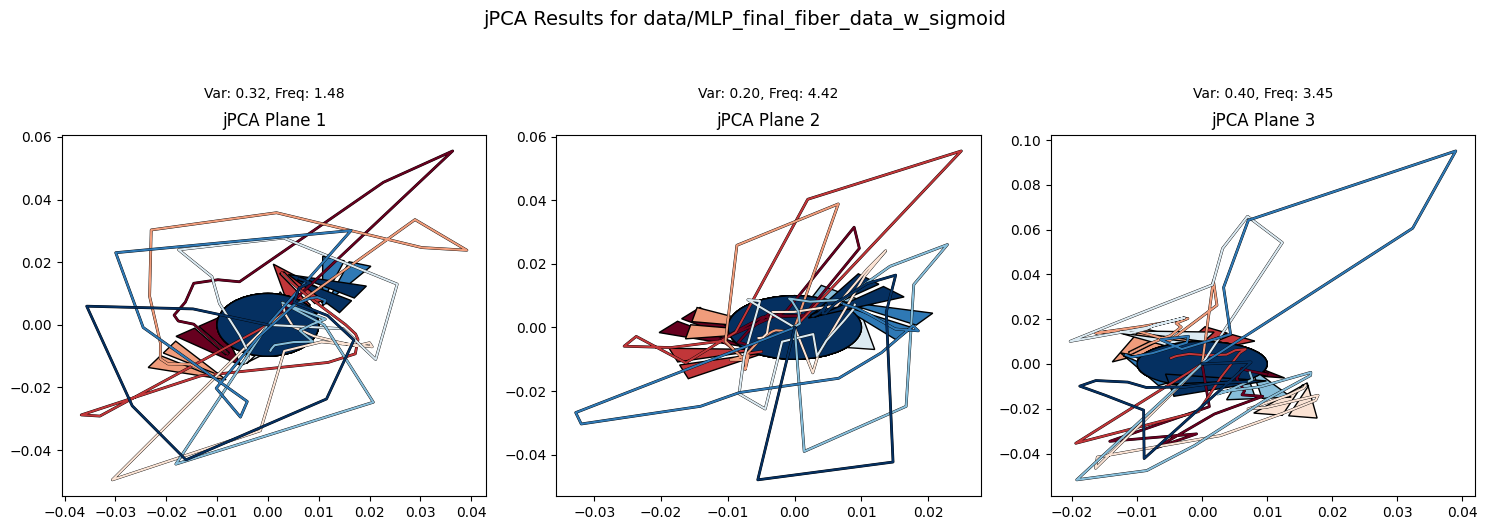

data/MLP_final_fiber_data_w_sigmoid.mat
[0.14254932 0.17524249 0.06220369 0.1373041  0.06242518 0.34135151]
variance:  0.9210762949916779
frequency:  [1.48014097 1.48014097 4.42450742 4.42450742 3.45366227 3.45366227]
[0.07736223 0.15281082 0.21327972 0.16510224 0.10359073 0.21222416]


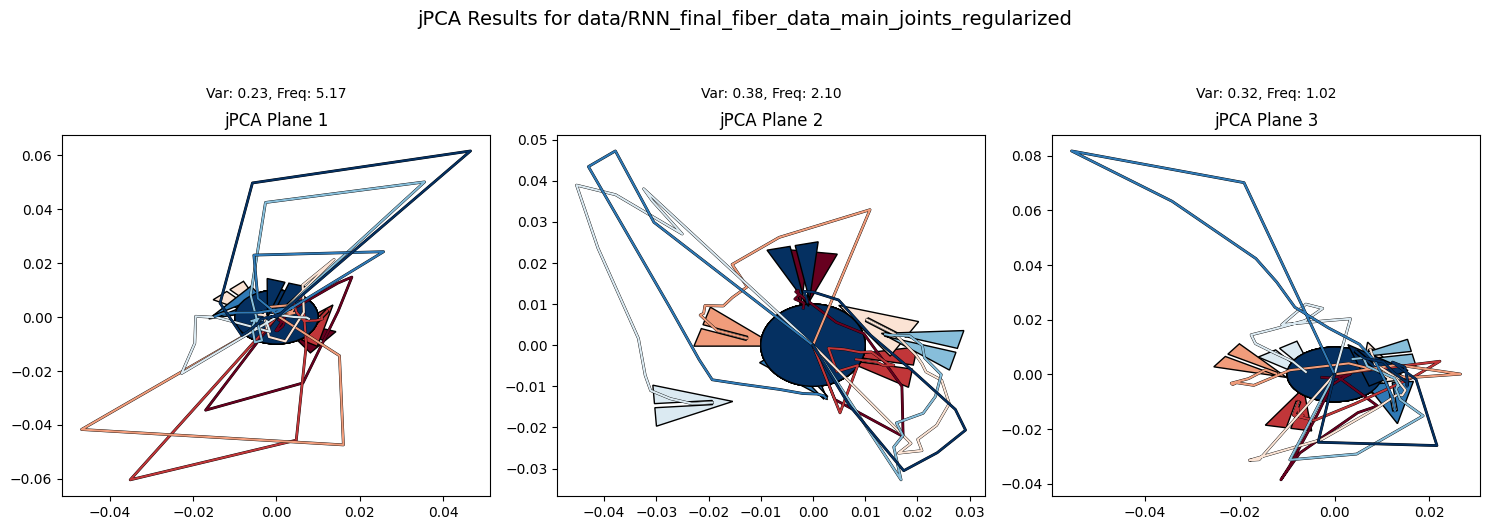

data/RNN_final_fiber_data_main_joints_regularized
[0.07736223 0.15281082 0.21327972 0.16510224 0.10359073 0.21222416]
variance:  0.924369904750291
frequency:  [5.17253565 5.17253565 2.10084525 2.10084525 1.01859164 1.01859164]


In [68]:
# Load publicly available data from Mark Churchland's group
A = "data/RNN_w_feedback_fiber_data.mat"
B = "data/MLP_final_fiber_data_w_sigmoid.mat"
C = "data/RNN_final_fiber_data_main_joints_regularized"

mats = [A, B, C]

for x in mats:
    neural = JPCA_calc(x, tstart=0, tend=0.24)
    print(x)
    print("variance: ", np.sum(neural.get_variance()))
    print("frequency: ", neural.get_eigen())


# Joint Data

data/RNN_w_feedback_joint.mat
[0.03743515 0.04423435 0.46633941 0.06536848 0.23678524 0.07527023]


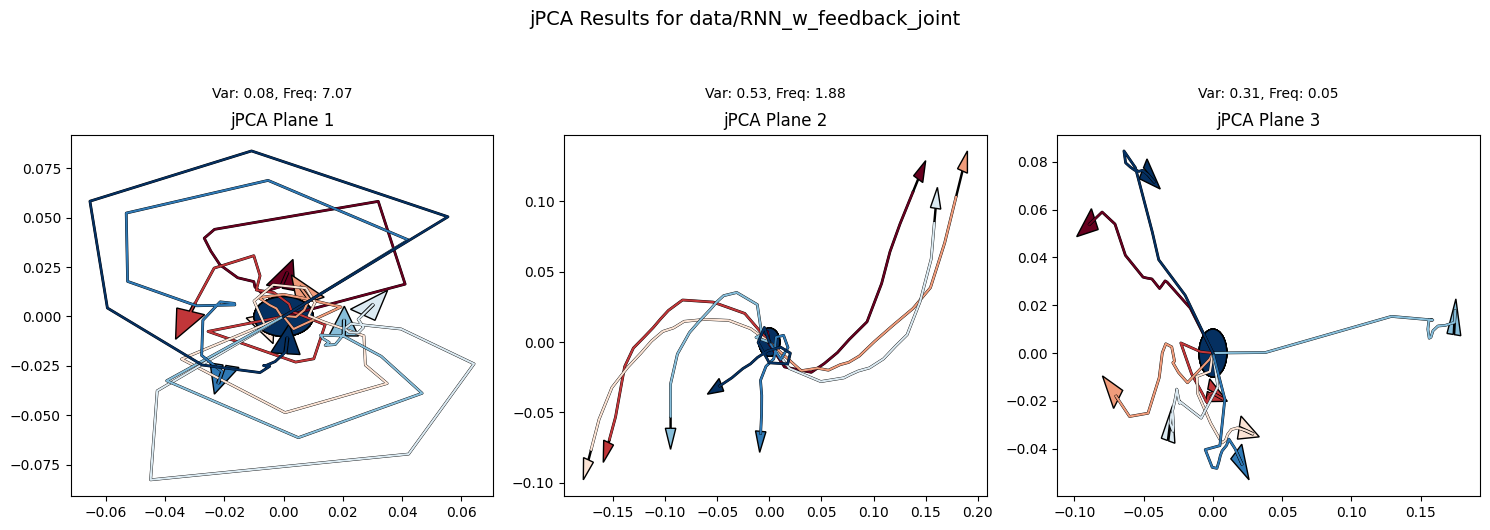

[0.03743515 0.04423435 0.46633941 0.06536848 0.23678524 0.07527023]
variance:  0.9254328601743086
frequency:  [7.06647947 7.06647947 1.87802833 1.87802833 0.04774648 0.04774648]
data/MLP_final_joint_data_w_sigmoid.mat
[0.1226947  0.04957743 0.20475377 0.05020775 0.49324479 0.05614247]


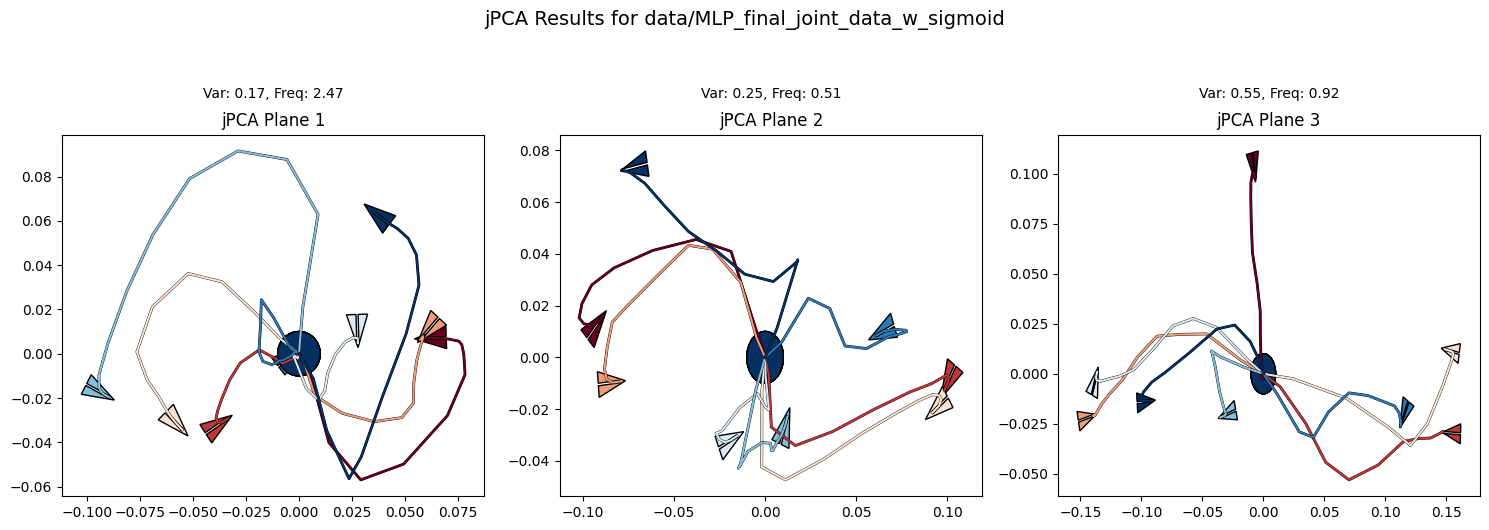

[0.1226947  0.04957743 0.20475377 0.05020775 0.49324479 0.05614247]
variance:  0.9766209133986177
frequency:  [2.46690162 2.46690162 0.50929582 0.50929582 0.92309867 0.92309867]
data/RNN_final_joint_data_main_joints_regularized.mat
[0.16371277 0.07990372 0.43123176 0.08039679 0.11649508 0.08237124]


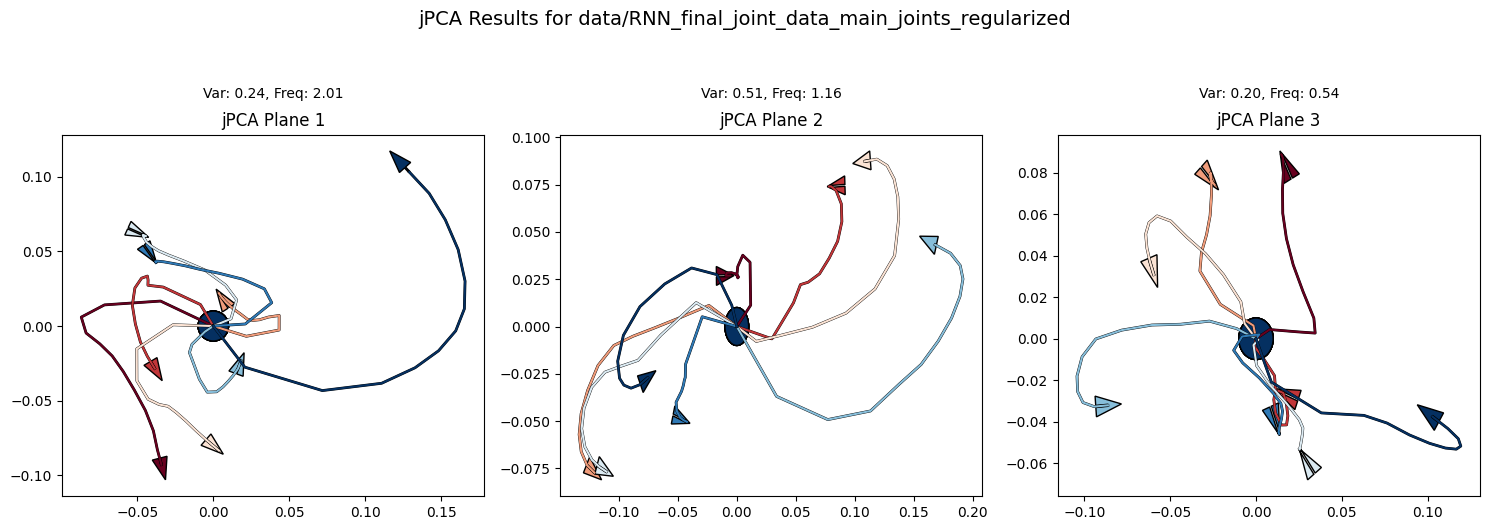

[0.16371277 0.07990372 0.43123176 0.08039679 0.11649508 0.08237124]
variance:  0.9541113626944517
frequency:  [2.00535228 2.00535228 1.16183108 1.16183108 0.54112681 0.54112681]


In [69]:
# Load publicly available data from Mark Churchland's group
A = "data/RNN_w_feedback_joint.mat"
B = "data/MLP_final_joint_data_w_sigmoid.mat"
C = "data/RNN_final_joint_data_main_joints_regularized.mat"

mats = [A, B, C]

for x in mats:
    print(x)
    neural = JPCA_calc(x, tstart=0, tend=0.24)
    print("variance: ", np.sum(neural.get_variance()))
    print("frequency: ", neural.get_eigen())



[0.0903326  0.06027509 0.04272994 0.04551188 0.23768963 0.5014299 ]


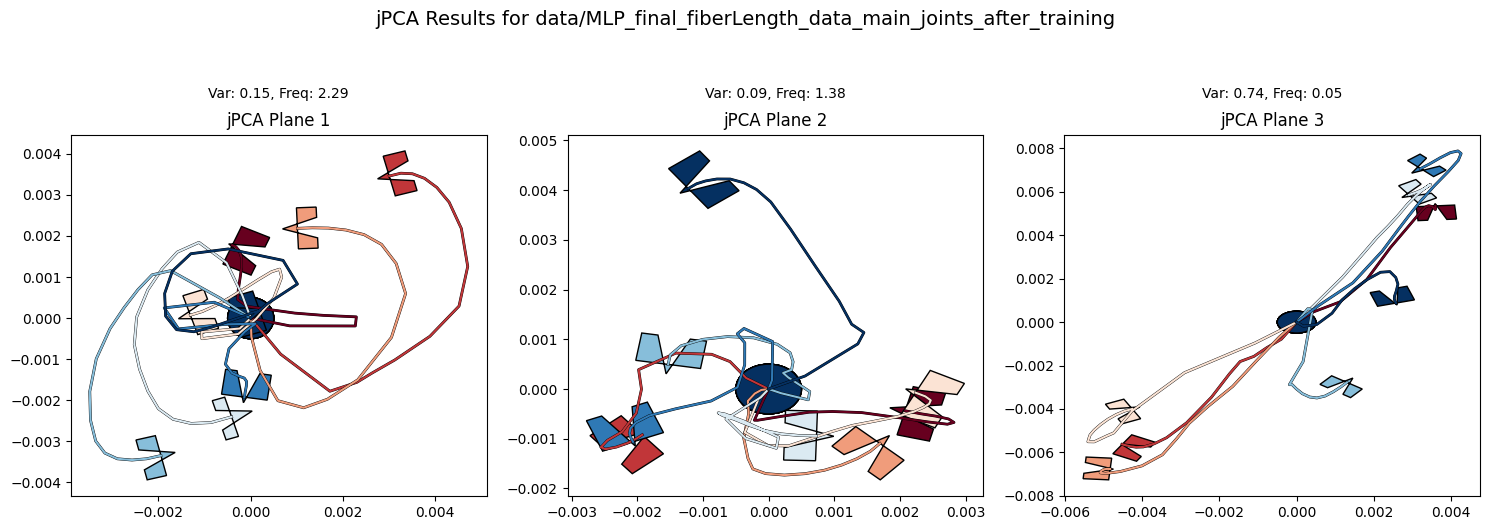

data/MLP_final_fiberLength_data_main_joints_after_training.mat
[0.0903326  0.06027509 0.04272994 0.04551188 0.23768963 0.5014299 ]
variance:  0.9779690228761811
frequency:  [2.29183118 2.29183118 1.384648   1.384648   0.04774648 0.04774648]
[0.11922795 0.04099482 0.25217501 0.05733472 0.48994047 0.02748279]


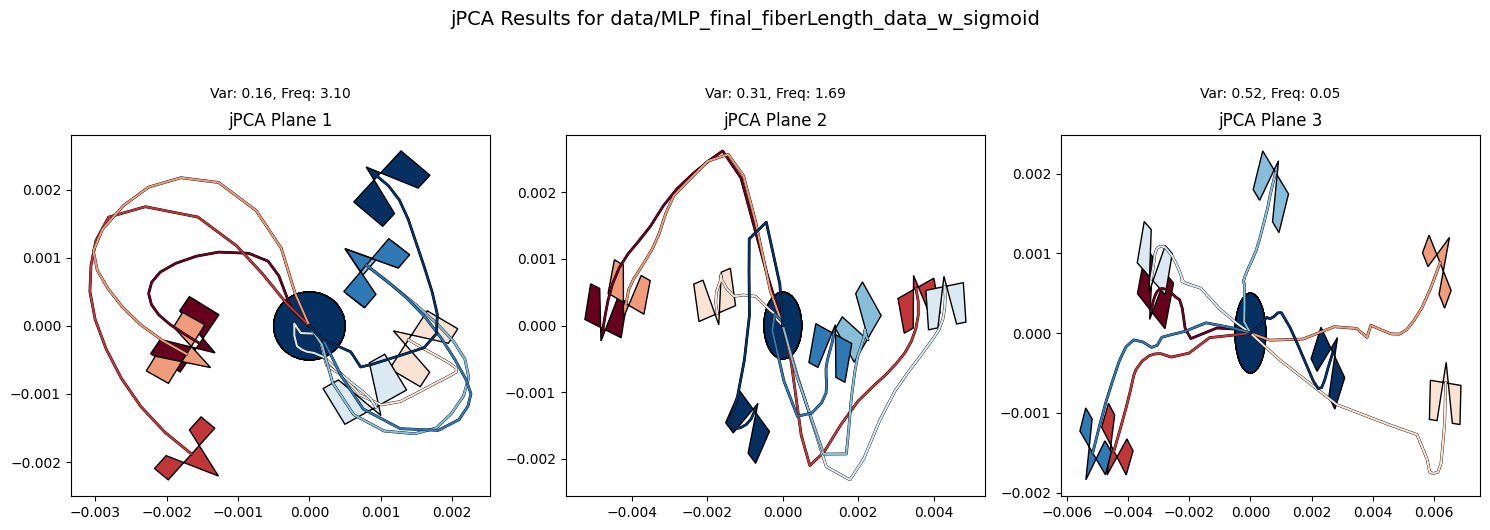

data/MLP_final_fiberLength_data_w_sigmoid.mat
[0.11922795 0.04099482 0.25217501 0.05733472 0.48994047 0.02748279]
variance:  0.9871557628543721
frequency:  [3.10352139 3.10352139 1.6870424  1.6870424  0.04774648 0.04774648]
[0.07499994 0.0314924  0.54330077 0.03957901 0.25097162 0.04753358]


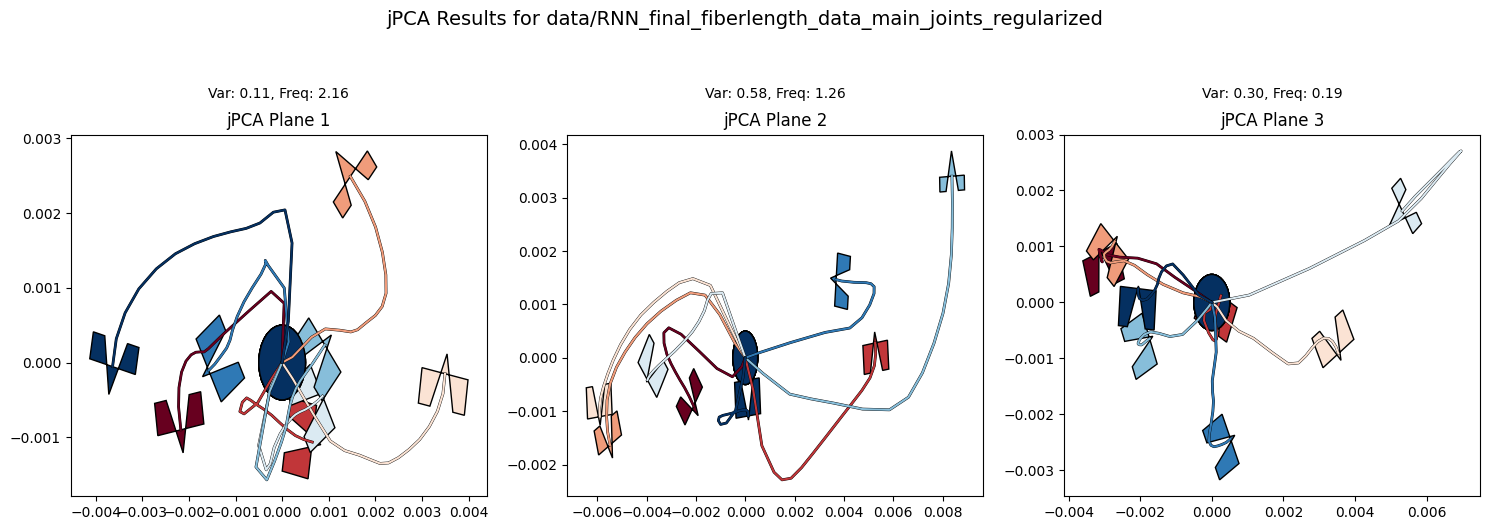

data/RNN_final_fiberlength_data_main_joints_regularized
[0.07499994 0.0314924  0.54330077 0.03957901 0.25097162 0.04753358]
variance:  0.9878773225195179
frequency:  [2.16450723 2.16450723 1.25732405 1.25732405 0.19098593 0.19098593]


In [ ]:
# Load publicly available data from Mark Churchland's group
A = "data/MLP_final_fiberLength_data_main_joints_after_training.mat"
B = "data/MLP_final_fiberLength_data_w_sigmoid.mat"
C = "data/RNN_final_fiberlength_data_main_joints_regularized"

mats = [A, B, C]

for x in mats:
    neural = JPCA_calc(x)
    print(x)
    print("variance: ", np.sum(neural.get_variance()))
    print("frequency: ", neural.get_eigen())


[0.18611126 0.16960187 0.06326826 0.10725778 0.31130525 0.07025737]


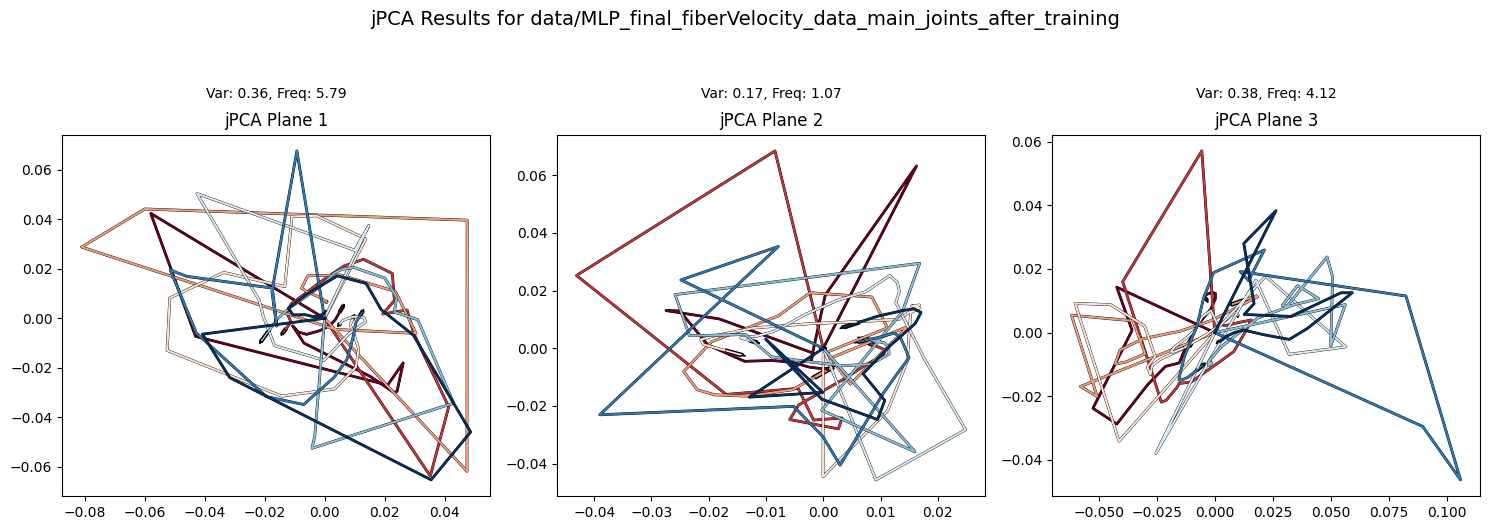

data/MLP_final_fiberVelocity_data_main_joints_after_training.mat
[0.18611126 0.16960187 0.06326826 0.10725778 0.31130525 0.07025737]
variance:  0.9078017809844808
frequency:  [5.79323993 5.79323993 1.06633812 1.06633812 4.12211303 4.12211303]
[0.21776586 0.08292164 0.10290818 0.11408672 0.25231774 0.13357206]


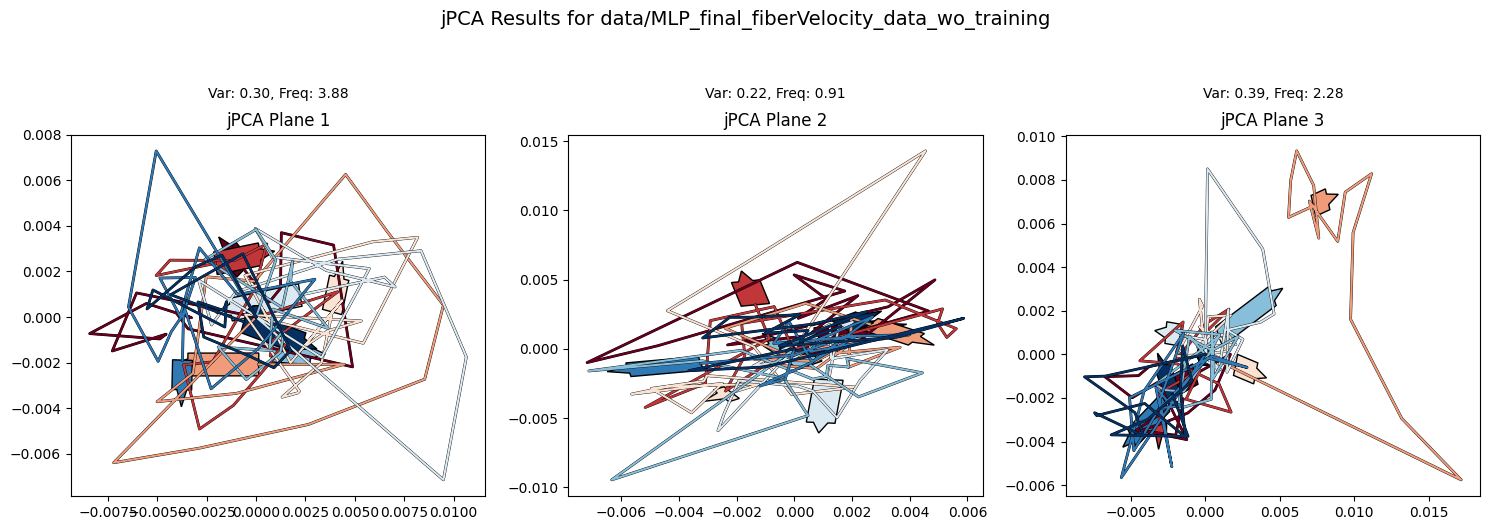

data/MLP_final_fiberVelocity_data_wo_training.mat
[0.21776586 0.08292164 0.10290818 0.11408672 0.25231774 0.13357206]
variance:  0.9035721973952776
frequency:  [3.88338061 3.88338061 0.90718318 0.90718318 2.27591569 2.27591569]
[0.16431477 0.05619747 0.21278946 0.15841537 0.15016376 0.16600267]


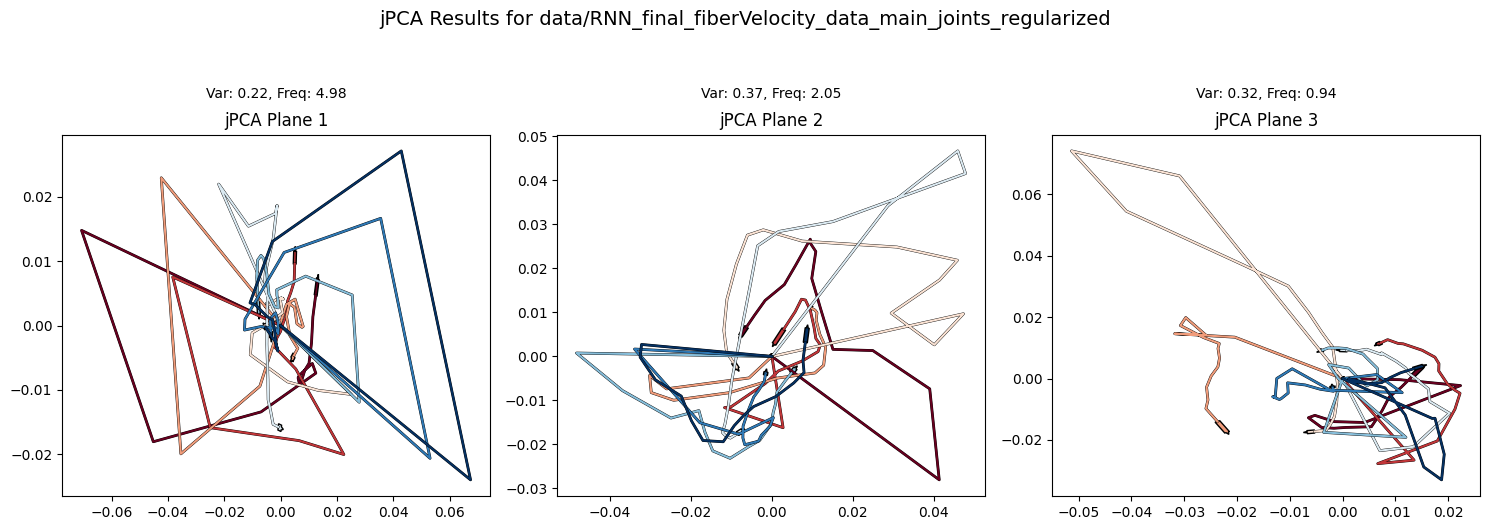

data/RNN_final_fiberVelocity_data_main_joints_regularized
[0.16431477 0.05619747 0.21278946 0.15841537 0.15016376 0.16600267]
variance:  0.9078835104285512
frequency:  [4.98154972 4.98154972 2.05309877 2.05309877 0.93901416 0.93901416]


In [ ]:
# Load publicly available data from Mark Churchland's group
A = "data/MLP_final_fiberVelocity_data_main_joints_after_training.mat"
B = "data/MLP_final_fiberVelocity_data_wo_training.mat"
C = "data/RNN_final_fiberVelocity_data_main_joints_regularized"

mats = [A, B, C]


for x in mats:
    neural = JPCA_calc(x)
    print(x)
    print("variance: ", np.sum(neural.get_variance()))
    print("frequency: ", neural.get_eigen())
